In [51]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn
%matplotlib inline
from datetime import datetime

In [47]:
cci = pd.read_csv("CCI.csv", delimiter=',')
unemployment = pd.read_csv("unemployment.csv", delimiter=',')
umcsent = pd.read_csv('UMCSENT.csv', delimiter = ',')
cci = cci.iloc[:,0:2]

In [22]:
#process date information so it is plottable
dates = np.array(cci.iloc[:,0:1])
date = []
for i in range(0, dates.shape[0]):
    d = str(dates[i])
    d = d.replace(',', '')
    d = d.replace("'", '')
    d = d.replace('[', '')
    d = d.replace(']', '')
    d = datetime.strptime(d, '%d-%b-%y')
    date.append(d)

In [23]:
cci_vals = np.array(cci.iloc[:,1:2])
cci_lst = []
for i in range(0,cci_vals.shape[0]):
    c = int(cci_vals[i])
    cci_lst.append(c)

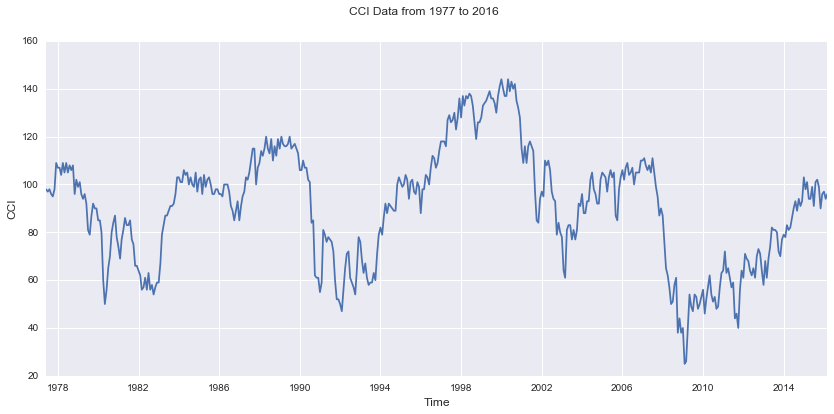

In [24]:
plt.figure(figsize=(14,6))
plt.plot(date, cci_lst)
plt.xlabel('Time',  fontsize = 12)
plt.ylabel('CCI',  fontsize = 12)
plt.suptitle('CCI Data from 1977 to 2016',  fontsize = 12)
plt.show()

In this case, we plot the Consumer Confidence Index (CCI), another consumer sentiment survey conducted by The Conference Board, a global business and research association that produces economic indicators. We had datasets from past classes, and decided to plot it to gain an understanding of what consumer sentiment data would look like. We can see here that certain peaks, such as the significant drop between 2007-2009, can be contributed to events in history such as the financial market crash of 2008. However, we chose not to move forward with CCI and used Michigan Consumer Sentiment Index (MCI) because CCI is protected by a paywall while MCI is not, and in the interest of being able to continue this in the future and be accessible for anyone who wants to try this, we ultimately chose MCI as the indicator we wanted to predict.

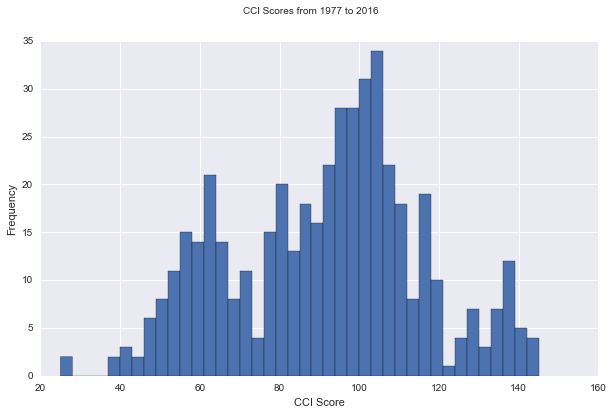

In [45]:
binwidth = 3
plt.figure(figsize=(10,6))
plt.hist(cci_lst, bins = np.arange(min(cci_lst), max(cci_lst) + binwidth, binwidth))
plt.xlabel('CCI Score')
plt.ylabel('Frequency')
plt.suptitle('CCI Scores from 1977 to 2016')
plt.show()

We put together a quick histogram to gauge what "normal" might be considered, and grasp an understanding of the distributions of the scores.

In [6]:
#process date information so it is plottable
dates = np.array(umcsent.iloc[:,0:1])
date = []
for i in range(0, dates.shape[0]):
    d = str(dates[i])
    d = d.replace(',', '')
    d = d.replace("'", '')
    d = d.replace('[', '')
    d = d.replace(']', '')
    d = datetime.strptime(d, '%d-%b-%Y')
    date.append(d)

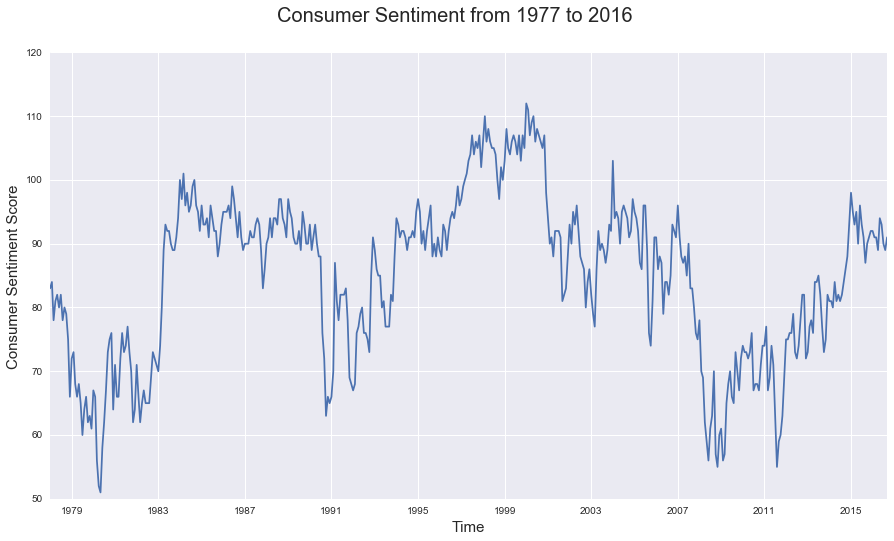

In [46]:
plt.figure(figsize=(15,8))
UM, = plt.plot(date_um, um_lst)
plt.xlabel('Time',  fontsize = 15)
plt.ylabel('Consumer Sentiment Score',  fontsize = 15)
plt.suptitle('Consumer Sentiment from 1977 to 2016',  fontsize = 20)
plt.show()

When we plot the University of Michigan Consumer Sentiment Index (MCI), we can see that it is similar to that of the CCI data, and that peaks can be cites to real, historical events such as the recession of the early 1990's, and the financial crisis of 2007-2008 and its lingering effects.

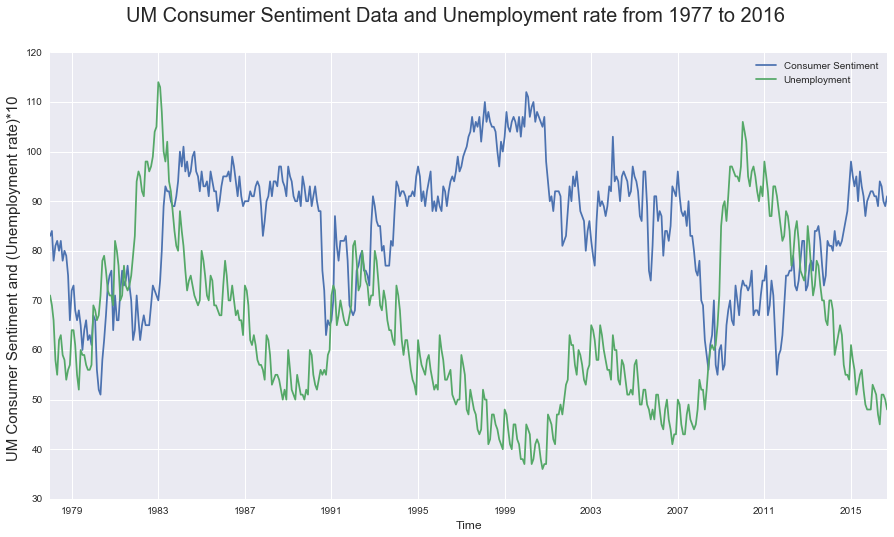

In [48]:
#process date information so it is plottable
dates_um = np.array(umcsent.iloc[:,0:1])
date_um = []
for i in range(0, dates_um.shape[0]):
    d = str(dates_um[i])
    d = d.replace(',', '')
    d = d.replace("'", '')
    d = d.replace('[', '')
    d = d.replace(']', '')
    d = datetime.strptime(d, '%d-%b-%Y')
    date_um.append(d)
um_vals = np.array(umcsent.iloc[:,1:2])
um_lst = []
for i in range(0,um_vals.shape[0]):
    c = int(um_vals[i])
    um_lst.append(c)
plt.figure(figsize=(15, 8))
UM, = plt.plot(date_um, um_lst)
UN, = plt.plot(date_um, 10*unemployment.ix[12:, 1])
plt.xlabel('Time',  fontsize = 12)
plt.ylabel('UM Consumer Sentiment and (Unemployment rate)*10 ', fontsize = 15)
plt.suptitle('UM Consumer Sentiment Data and Unemployment rate from 1977 to 2016',  fontsize = 20)
plt.legend((UM, UN), ('Consumer Sentiment', "Unemployment"))
plt.show()

UM Consumer Sentiment data and unemployment rate (multiplied by 10, for comparison purposes). The two appear to be inversely correlated, which is consistent with the idea that a higher unemployment rate would cause people to be less optimistic about the economy.

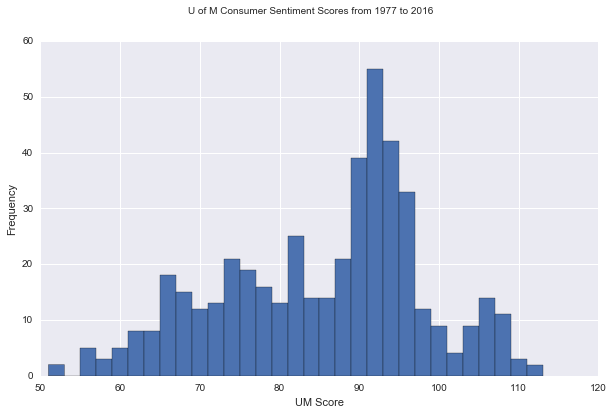

In [28]:
binwidth = 2
plt.figure(figsize=(10,6))
plt.hist(um_lst, bins = np.arange(min(um_lst), max(um_lst) + binwidth, binwidth))
plt.xlabel('UM Score')
plt.ylabel('Frequency')
plt.suptitle('U of M Consumer Sentiment Scores from 1977 to 2016')
plt.show()

In [38]:
inflation = pd.read_csv('InflationData.csv')

In [49]:
#process date data so that is it plottable
inflation_date = np.array(inflation.iloc[:,0:1])
inflation_date_lst = []
for i in range(0, inflation_date.shape[0]):
    u = str(inflation_date[i])
    u = u.replace(',', '')
    u = u.replace("'", '')
    u = u.replace('[', '')
    u = u.replace(']', '')
    u = datetime.strptime(u, '%d-%b-%y')
    inflation_date_lst.append(u)
cpi = np.array(inflation.iloc[:,1:2])
cpi_log = np.array(inflation.iloc[:,2:3])
pce = np.array(inflation.iloc[:,3:4])
pce_log = np.array(inflation.iloc[:,4:5])

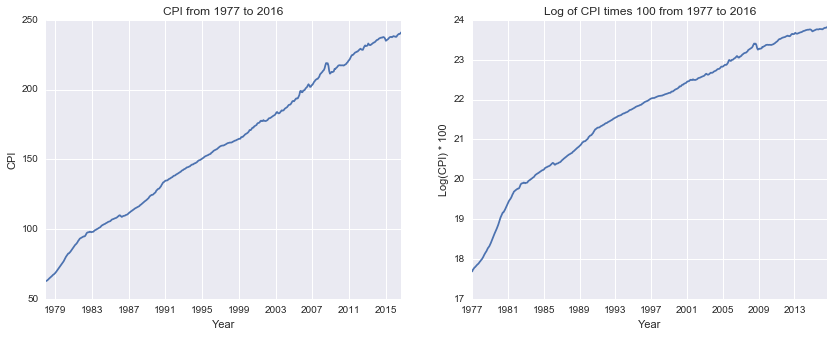

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
ax1.plot(inflation_date_lst[12:], cpi[12:])
ax2.plot(inflation_date_lst, cpi_log/10)

#prettiy
ax1.set_xlabel('Year')
ax2.set_xlabel("Year")
ax1.set_ylabel('CPI')
ax2.set_ylabel('Log(CPI) * 100')
ax1.set_title("CPI from 1977 to 2016")
ax2.set_title("Log of CPI times 100 from 1977 to 2016")
plt.show()

Here we plot Consumer Price Index (CPI), one of the 2 most popular inflation indices. It's difficult to tell much looking at the left graph, except for the small drop around 2008, so we take the log of the data to try and better visualize the changes of the CPI.

In [42]:
pce_change = pd.read_csv('PCEchange.csv')

In [43]:
inflation_date = np.array(pce_change.iloc[:,0:1])
inflation_date_lst = []
for i in range(0, inflation_date.shape[0]):
    u = str(inflation_date[i])
    u = u.replace(',', '')
    u = u.replace("'", '')
    u = u.replace('[', '')
    u = u.replace(']', '')
    u = datetime.strptime(u, '%d-%b-%Y')
    inflation_date_lst.append(u)
pce_ch = np.array(pce_change.iloc[:,1:2])

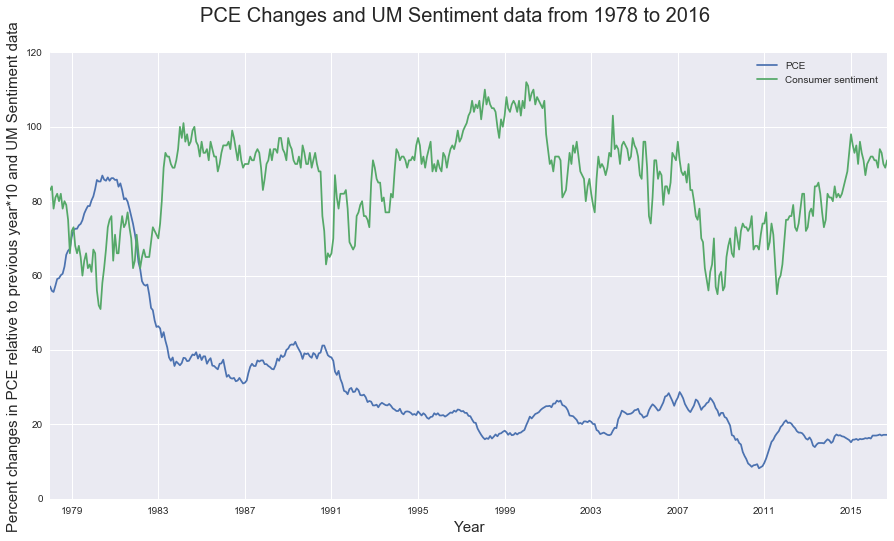

In [44]:
plt.figure(figsize = (15,8))
PCE, = plt.plot(inflation_date_lst, 10*pce_ch)
UM, = plt.plot(inflation_date_lst, um_lst)
plt.suptitle('PCE Changes and UM Sentiment data from 1978 to 2016', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Percent changes in PCE relative to previous year*10 and UM Sentiment data', fontsize = 15)
plt.legend((PCE, UM), ('PCE', "Consumer sentiment"))
plt.show()

Personal Consumption Expenditures (PCE) is a less well-known inflation index, but is actually often considered a better index because of its more comprehensive basis in corporate/company data. We plot the percent changes in PCE, which is what we are really interested in, along with the MCI data and can see that there is a rough inverse correlation for the most part between the two, which makes sense because price changes generally influence how people feel about the economy.